Exploratory data analysis (EDA) is a crucial component of data science which allows you to understand the basics of what your data looks like and what kinds of questions might be answered. For this task, we are going to clean, sanitise and explore our data. Using the automobile dataset, complete the steps outlined in this notebook by writing code in the cells.

In [15]:
# Import libraries

import numpy as np
import pandas as pd
import seaborn as sns

from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline

### Step 1: Data Loading

In [16]:
# Load the movies dataset
automobiles_df = pd.read_csv('automobile.txt')


# Introduction
In this notebook, we analyze the automobile.txt.
The purpose is to analyze automobiles data.
This analysis includes data cleaning, visualization, and statistical modeling to draw insights.


### Step 2: Data Cleansing
#### Clean the data

Identify columns that are redundant or unnecessary. It is always easier to make your decisions based on data which is relevant and concise. Remove the following columns `['normalized-losses', 'symboling']` from the data set as they will not be used in the analysis.

In [17]:
# Drops columns normalized-losses',and 'symboling'
automobiles_df.drop(['normalized-losses','symboling'], inplace = True, axis = 1)


#### Remove any duplicate rows

In [18]:
# Code here
automobiles_df.drop_duplicates(inplace=True)


#### Remove rows with missing data

Some automobiles in the database have missing values which implies that their values have not been recorded or some information is missing. Discard such entries from the dataframe.

In [19]:
automobiles_df.dropna(axis = 0, inplace = True)


Change columns with numerical data column to an integer data type using numpy’s `int64` method.

In [20]:
for col in automobiles_df.select_dtypes(include=['float64']).columns:
    automobiles_df[col] = automobiles_df[col].astype(np.int64)


#### Check if names do not repeat

In [21]:
names = automobiles_df['make'].unique()
print(f"There are {len(names)} unique names")
names

There are 22 unique names


array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'mercedes-benz', 'mercury',
       'mitsubishi', 'nissan', 'peugot', 'plymouth', 'porsche', 'renault',
       'saab', 'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

All names are unique.

### Step 3: Exploration and Visualization
### Finding Certain Categories
Locate all automobiles in the "hatchback" genre.

In [23]:
# Create a dataframe with all the cars in the "hatchback' category
hatchback_cars = automobiles_df[automobiles_df['body-style'] == 'hatchback']

### Now onto the exploration

#### Identify relationships between variables (features)

The main goal here is to identify and create relationships that can help you formulate ideas. We have defined questions to help you identify some relationships to explore.

#### Which are the 5 most expensive cars?

How do the most expensive and cheapest cars compare? Exploring the most expensive cars highlights if some moviecars are worth the money spent on them based on their fuel economy (mpg or miles per gallon)

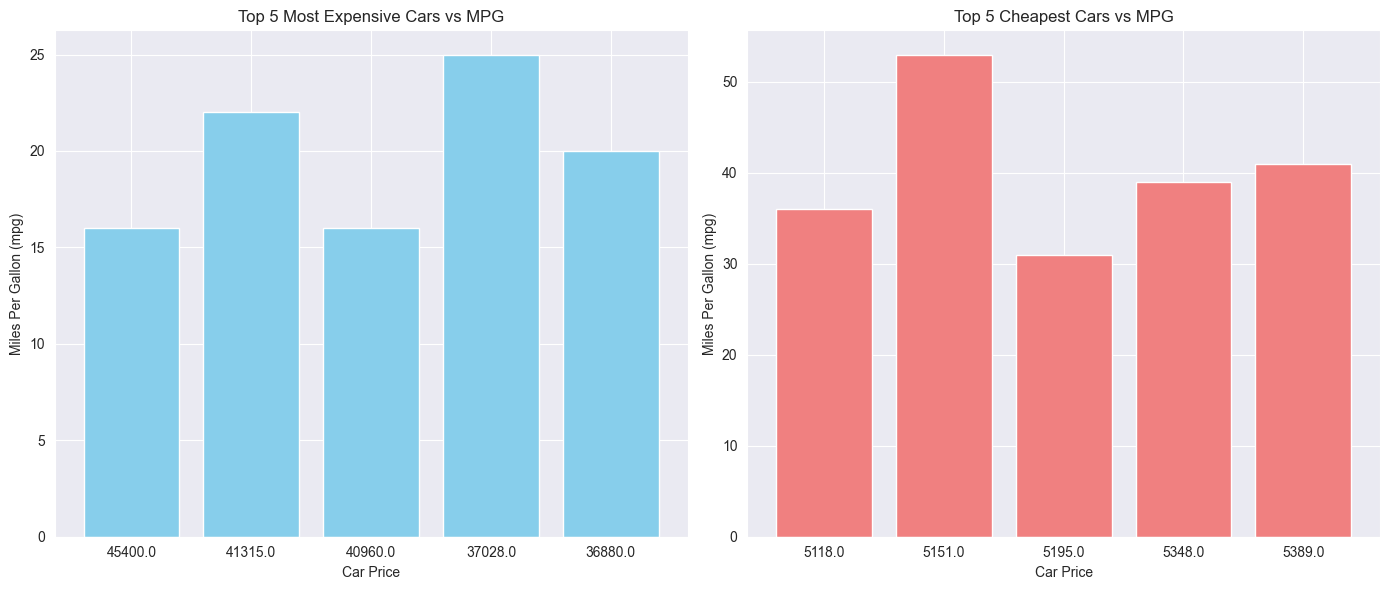

In [26]:
# Ensure 'price' is numeric
automobiles_df["price"] = pd.to_numeric(automobiles_df["price"], errors="coerce")

# Drop rows with missing price or mpg
df = automobiles_df.dropna(subset=["price", "highway-mpg"])

# Get top 5 most expensive
top5 = df.nlargest(5, "price")

# Get bottom 5 cheapest
bottom5 = df.nsmallest(5, "price")

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot most expensive
axes[0].bar(top5["price"].astype(str), top5["highway-mpg"], color="skyblue")
axes[0].set_title("Top 5 Most Expensive Cars vs MPG")
axes[0].set_xlabel("Car Price")
axes[0].set_ylabel("Miles Per Gallon (mpg)")

# Plot cheapest
axes[1].bar(bottom5["price"].astype(str), bottom5["highway-mpg"], color="lightcoral")
axes[1].set_title("Top 5 Cheapest Cars vs MPG")
axes[1].set_xlabel("Car Price")
axes[1].set_ylabel("Miles Per Gallon (mpg)")

plt.tight_layout()
plt.show()

By comparing both graphs, we can clearly see that the cheapest cars have significantly better fuel efficiency than the most expensive ones. In fact, even the lowest fuel-efficient car among the cheapest group has a higher MPG than the most fuel-efficient car in the most expensive group.

#### Which manufacturer builds the most fuel efficient vehicles?

Compare the average mpg for each vehicle manufacture's vehicles and create a bar plot

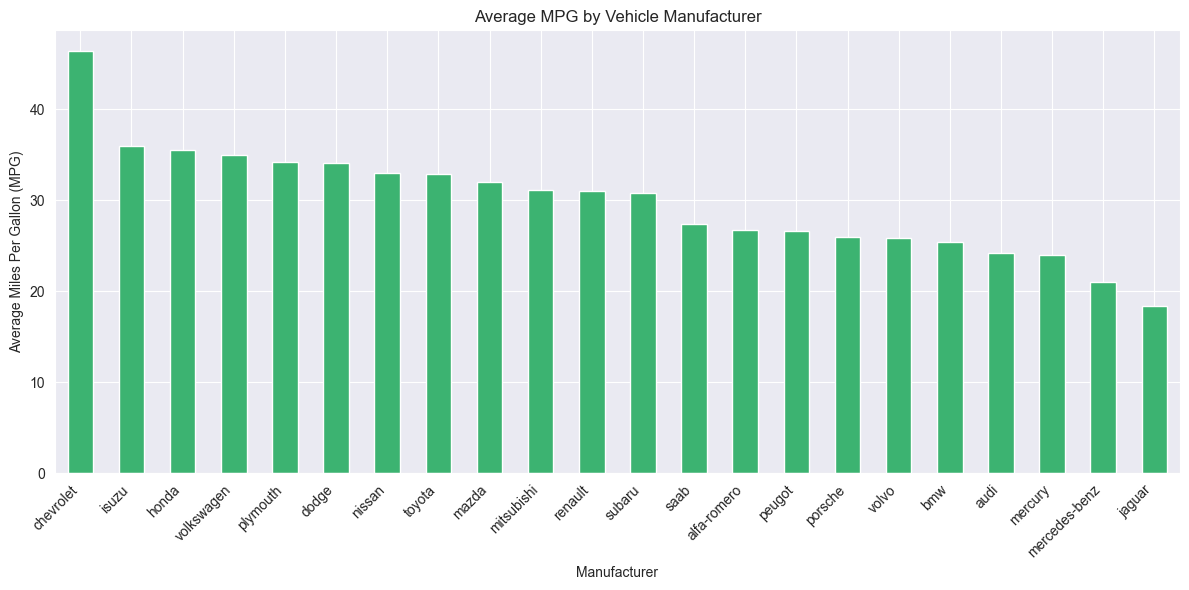

In [36]:
# Ensure 'mpg' is numeric
automobiles_df["mpg"] = pd.to_numeric(automobiles_df["highway-mpg"], errors="coerce")

# Drop rows with missing values
automobiles_df = automobiles_df.dropna(subset=["make", "highway-mpg"])

# Group by manufacturer and calculate average MPG
avg_mpg = automobiles_df.groupby("make")["highway-mpg"].mean().sort_values(ascending=False)

# Plot
plt.figure(figsize=(12,6))
avg_mpg.plot(kind="bar", color="mediumseagreen")

plt.title("Average MPG by Vehicle Manufacturer")
plt.xlabel("Manufacturer")
plt.ylabel("Average Miles Per Gallon (MPG)")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()



In this graph, Chevrolet is clearly the make that is the most fuel efficient with over 40 MPG. Next is isuzu, honda, and volkswagen with average of 34 MPG.

#### Which vehicles have the largest engine capacity.
Sort the dataframe based on the engine-size column.

In [37]:
# Group by manufacturer and get the max engine size per make
make_max_engine = automobiles_df.groupby("make")["engine-size"].max().reset_index()

# Sort by engine size (largest to smallest)
make_max_engine_sorted = make_max_engine.sort_values(by="engine-size", ascending=False)

# Show top 10 manufacturers with largest engines
make_max_engine_sorted.head(10)


,make,engine-size
7,jaguar,326
9,mercedes-benz,308
2,bmw,209
15,porsche,203
12,nissan,181
21,volvo,173
19,toyota,171
4,dodge,156
14,plymouth,156
11,mitsubishi,156


This chart shows the top cars with the largest engine capacity. The three car companies with the largest engines are Jaguar, Mercedes-Benz, and BMW.

#### Which vehicle manufacturer has the most car models in the dataset

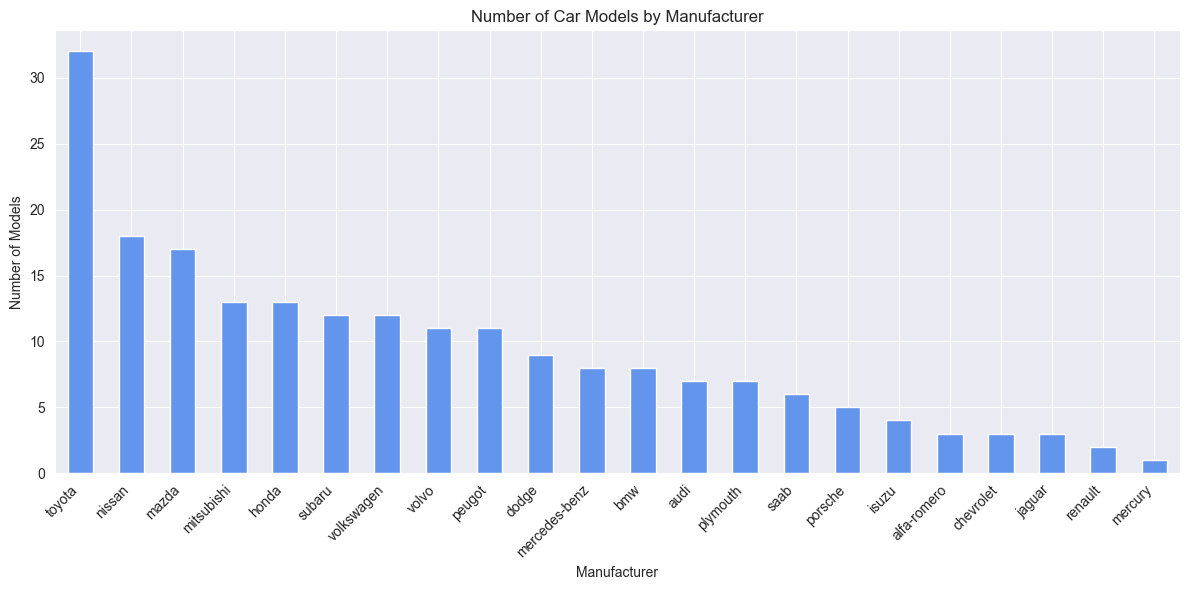

In [38]:
# Count number of car models per manufacturer
make_counts = automobiles_df["make"].value_counts()

# Plot
plt.figure(figsize=(12,6))
make_counts.plot(kind="bar", color="cornflowerblue")

plt.title("Number of Car Models by Manufacturer")
plt.xlabel("Manufacturer")
plt.ylabel("Number of Models")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()




This final graph shows the number of car models by manufacturer. Toyota has by far the most number of models shown in the data with over 30 times, second is nissan and third is mazda.

### Conclusion

After reviewing all the graphs, it is clear that a larger and more expensive engine does not necessarily lead to greater fuel efficiency or higher MPG. In fact, some lower-priced cars, such as Toyota models, achieve higher MPG with smaller engines compared to more expensive brands like Jaguar.